In [6]:
import pandas as pd
import numpy as np

In [7]:
logs = [
    {
        'lr': -4,
        'file': 'logs-0.0625.tsv'
    },
    {
        'lr': -4.667,
        'file': 'logs-0.039.tsv'
    },
    {
        'lr': -5.333,
        'file': 'logs-0.025.tsv'
    },
    {
        'lr': -6,
        'file': 'logs-0.016.tsv'
    },
    {
        'lr': -6.667,
        'file': 'logs-0.0098.tsv'
    },
    {
        'lr': -7.333,
        'file': 'logs-0.0062.tsv'
    },
    {
        'lr': -8,
        'file': 'logs-0.0039.tsv'
    },
    {
        'lr': -8.667,
        'file': 'logs-0.0025.tsv'
    },
    {
        'lr': -9.333,
        'file': 'logs-0.0016.tsv'
    },
    {
        'lr': -10,
        'file': 'logs-0.00097.tsv'
    }
]

In [8]:
logs.sort(key=lambda a: a['lr'])

In [9]:
logs

[{'lr': -10, 'file': 'logs-0.00097.tsv'},
 {'lr': -9.333, 'file': 'logs-0.0016.tsv'},
 {'lr': -8.667, 'file': 'logs-0.0025.tsv'},
 {'lr': -8, 'file': 'logs-0.0039.tsv'},
 {'lr': -7.333, 'file': 'logs-0.0062.tsv'},
 {'lr': -6.667, 'file': 'logs-0.0098.tsv'},
 {'lr': -6, 'file': 'logs-0.016.tsv'},
 {'lr': -5.333, 'file': 'logs-0.025.tsv'},
 {'lr': -4.667, 'file': 'logs-0.039.tsv'},
 {'lr': -4, 'file': 'logs-0.0625.tsv'}]

In [10]:
width_train_loss = []
for log in logs:
    lr = log['lr']
    raw_data = pd.read_csv('logs-xent-SP/'+log['file'], sep='\t')
    data = raw_data[raw_data['epoch'] == 20]['train_loss']
    width_train_loss.append({
        'lr': lr,
        'data': data.values
    })

In [11]:
data = []
widths = [64, 128, 256, 512, 1024, 2048]
for i in range(len(widths)):
    width = widths[i]
    xys = []
    for j in range(len(width_train_loss)):
        xys.append([width_train_loss[j]['lr'], width_train_loss[j]['data'][i]])
    data.append(np.array(xys))

In [12]:
data[0][:, 0]

array([-10.   ,  -9.333,  -8.667,  -8.   ,  -7.333,  -6.667,  -6.   ,
        -5.333,  -4.667,  -4.   ])

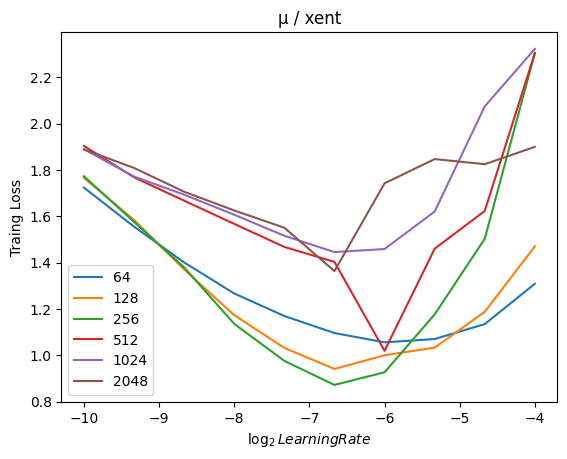

In [13]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt 



for i in range(len(data)):
    xs = data[i][:, 0]
    ys = data[i][:, 1]
    # cubic_interploation_model=interp1d(xs, ys, kind="cubic")
    # xs=np.linspace(-14, -4, 20)
    # ys=cubic_interploation_model(xs)
    plt.plot(xs, ys, label=str(widths[i]))
    plt.xlabel(r'$\log_2{LearningRate}$')
    plt.ylabel(r'Traing Loss')
    plt.title('μ / xent')
    plt.legend()

In [14]:
2**np.linspace(-10, -4, 10)

array([0.00097656, 0.0015502 , 0.00246078, 0.00390625, 0.00620079,
       0.00984313, 0.015625  , 0.02480314, 0.03937253, 0.0625    ])

In [15]:
np.linspace(-10, -4, 10)

array([-10.        ,  -9.33333333,  -8.66666667,  -8.        ,
        -7.33333333,  -6.66666667,  -6.        ,  -5.33333333,
        -4.66666667,  -4.        ])